In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
file_path = '/Users/zhangshuyi/Desktop/airbnb_scrape/Merged_data/data_filled.csv'
data = pd.read_csv(file_path)

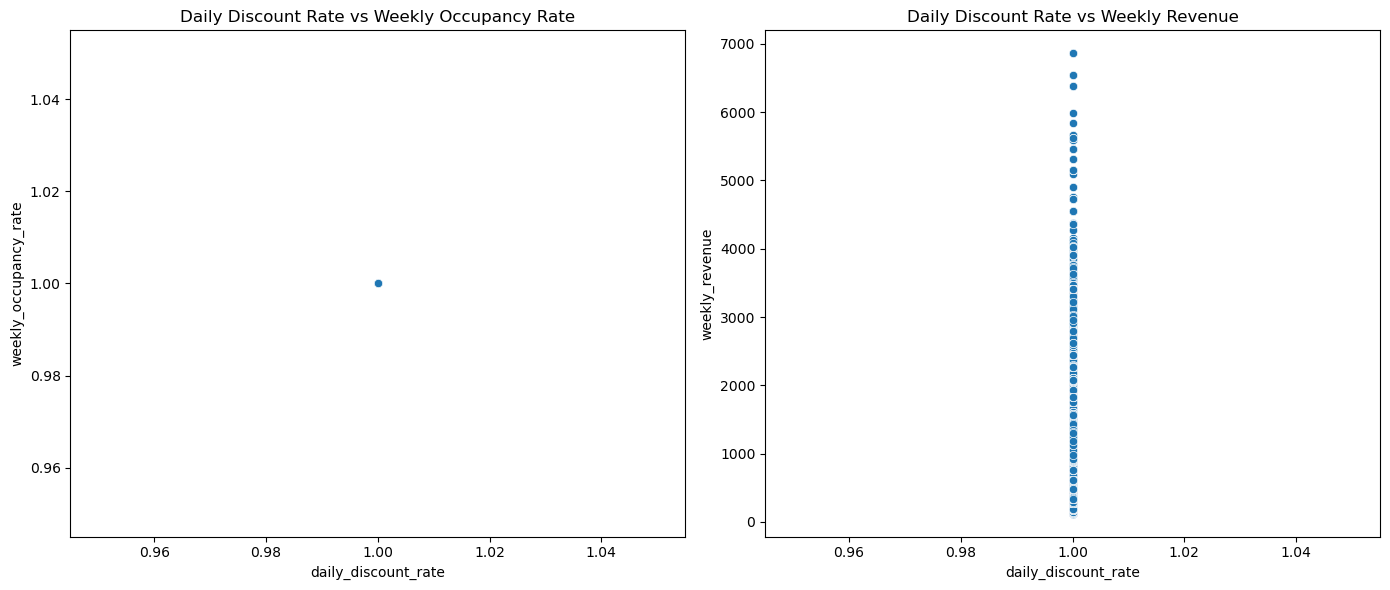

In [8]:
# Hypothesis 1: Daily Discount Rate and Occupancy Rate/Weekly Revenue
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=data['daily_discount_rate'], y=data['weekly_occupancy_rate'])
plt.title('Daily Discount Rate vs Weekly Occupancy Rate')

plt.subplot(1, 2, 2)
sns.scatterplot(x=data['daily_discount_rate'], y=data['weekly_revenue'])
plt.title('Daily Discount Rate vs Weekly Revenue')

plt.tight_layout()
plt.show()


Daily Discount Rate vs. Weekly Occupancy Rate: The data points are clustered at a daily discount rate of 1.0, with full weekly occupancy. This suggests no variation in the discount rate, hence no observable impact on occupancy.
Daily Discount Rate vs. Weekly Revenue: Similarly, the lack of variation in the discount rate leads to no discernible impact on weekly revenue.

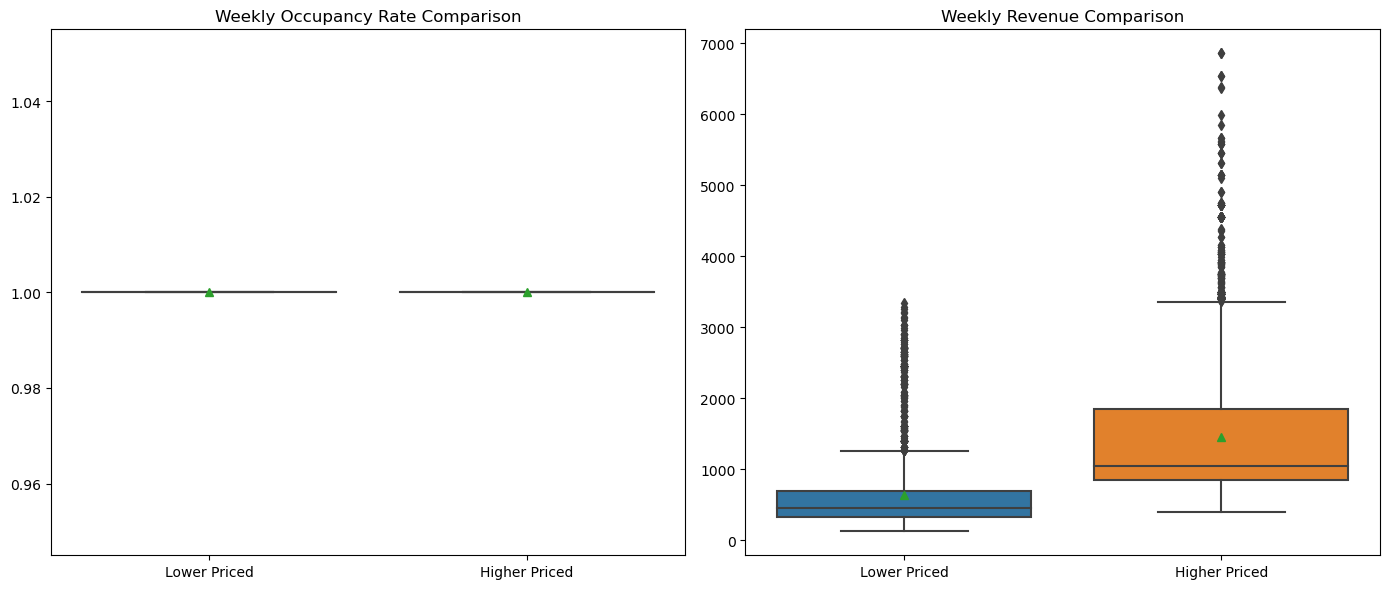

In [9]:
# Identify similar listings based on location, room type, number of beds, and bathrooms
similar_listings = data.groupby(['state', 'bath', 'bed']).apply(lambda x: x).reset_index(drop=True)

# Add a column indicating if the listing price is lower than the median price of similar listings
similar_listings['price_relative_to_median'] = similar_listings.groupby(['state', 'bath', 'bed'])['daily_price'].transform(lambda x: x < x.median())

# Compare occupancy rates and weekly revenue for lower priced listings
lower_priced_occupancy = similar_listings[similar_listings['price_relative_to_median'] == True]['weekly_occupancy_rate']
higher_priced_occupancy = similar_listings[similar_listings['price_relative_to_median'] == False]['weekly_occupancy_rate']

lower_priced_revenue = similar_listings[similar_listings['price_relative_to_median'] == True]['weekly_revenue']
higher_priced_revenue = similar_listings[similar_listings['price_relative_to_median'] == False]['weekly_revenue']

# Plot the comparison
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=[lower_priced_occupancy, higher_priced_occupancy], showmeans=True)
plt.xticks([0, 1], ['Lower Priced', 'Higher Priced'])
plt.title('Weekly Occupancy Rate Comparison')

plt.subplot(1, 2, 2)
sns.boxplot(data=[lower_priced_revenue, higher_priced_revenue], showmeans=True)
plt.xticks([0, 1], ['Lower Priced', 'Higher Priced'])
plt.title('Weekly Revenue Comparison')

plt.tight_layout()
plt.show()


Weekly Occupancy Rate Comparison: Both lower and higher priced listings show similar occupancy rates, with median occupancy being full (1.0).
Weekly Revenue Comparison: Higher priced listings tend to have higher weekly revenue compared to lower priced listings.

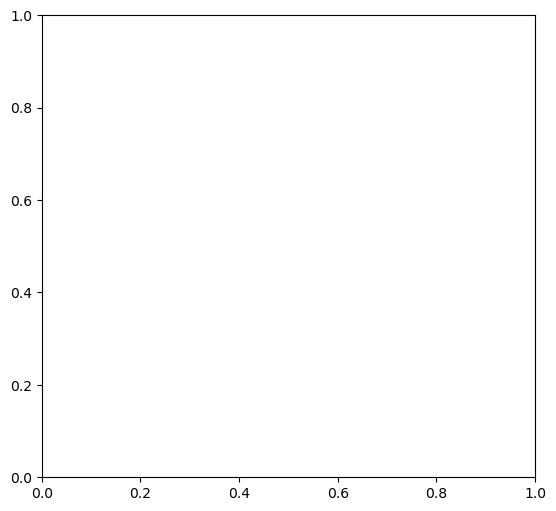

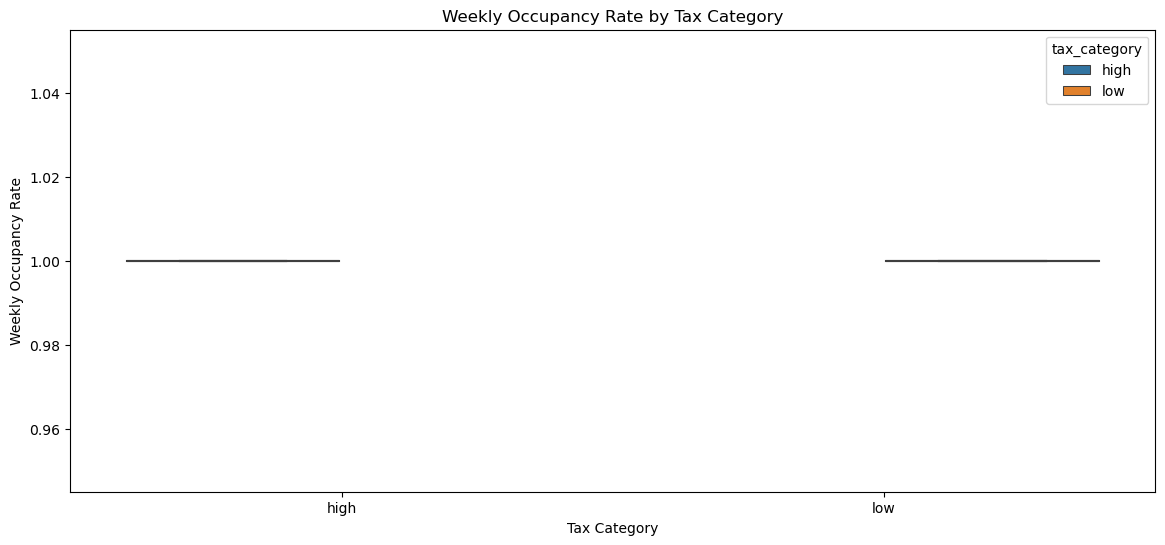

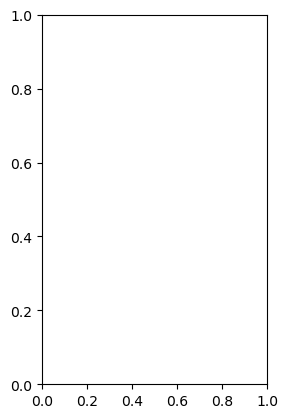

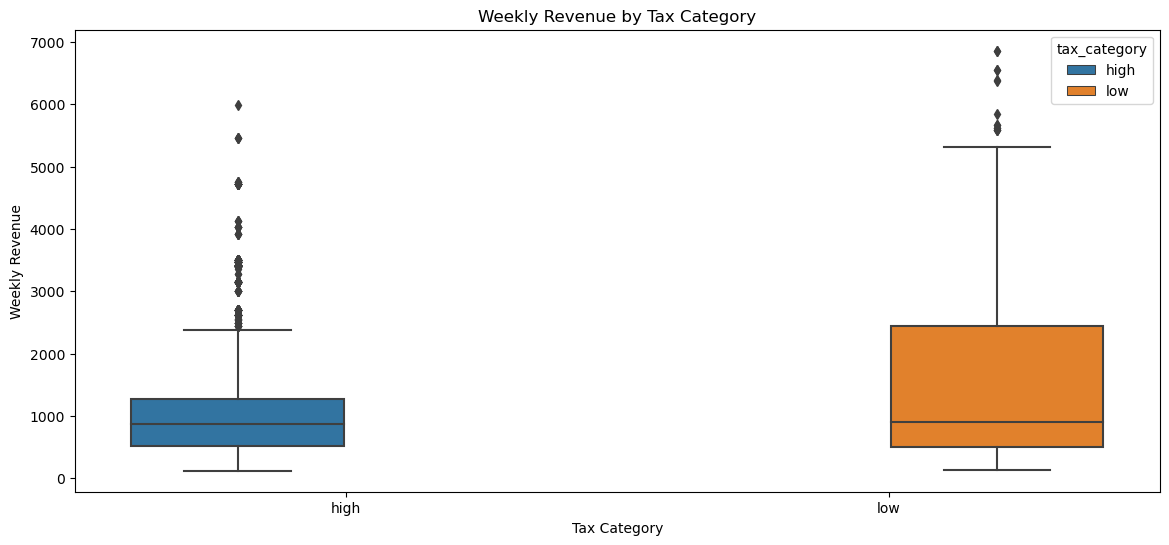

In [32]:
# Hypothesis 3
high_tax_states = ['Rhode Island', 'District of Columbia']
low_tax_states = ['New York', 'Colorado']

# Add a new column to categorize states as high tax or low tax
data['tax_category'] = data['state'].apply(lambda x: 'high' if x in high_tax_states else 'low' if x in low_tax_states else 'other')

# Filter data to include only high and low tax states
filtered_data = data[data['tax_category'].isin(['high', 'low'])]

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.figure(figsize=(14, 6))
sns.boxplot(data=filtered_data, x='tax_category', y='weekly_occupancy_rate', hue='tax_category')
plt.title('Weekly Occupancy Rate by Tax Category')
plt.xlabel('Tax Category')
plt.ylabel('Weekly Occupancy Rate')
plt.show()

plt.subplot(1, 2, 1)
plt.figure(figsize=(14, 6))
sns.boxplot(data=filtered_data, x='tax_category', y='weekly_revenue', hue='tax_category')
plt.title('Weekly Revenue by Tax Category')
plt.xlabel('Tax Category')
plt.ylabel('Weekly Revenue')
plt.show()


High Tax States:
- There are numerous outliers, with some values reaching up to about $4,000 to $6,000, indicating occasional high revenue figures.
Low Tax States:
- There are more extreme outliers in low tax states, with some revenue figures going up to $7,000.

Conclusion:
- The box plot indicates that low tax states generally have higher median weekly revenue but also exhibit greater variability and more extreme outliers compared to high tax states. High tax states, on the other hand, show a more consistent revenue pattern with fewer extreme high revenue cases.

- This analysis suggests that while low tax states might offer higher revenue potential, they also come with increased revenue variability. High tax states provide more stable but potentially lower revenue.

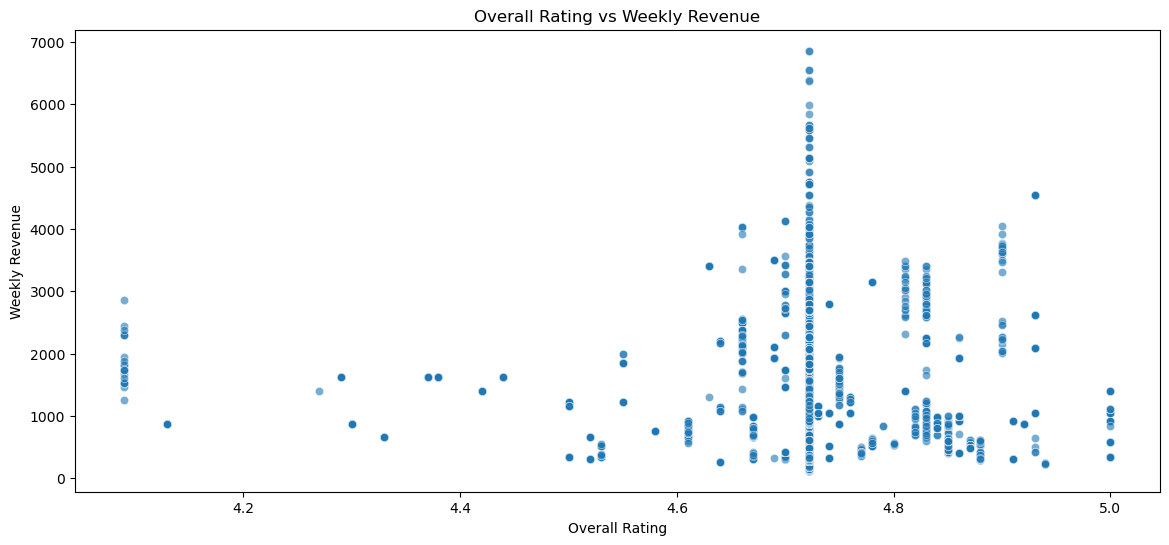

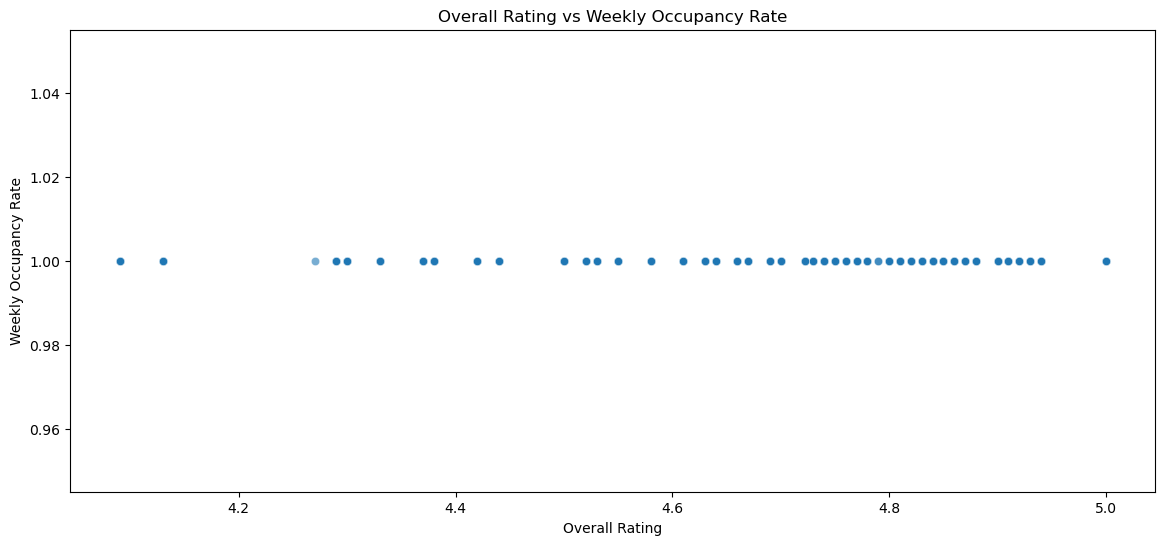

In [23]:
# Hypothesis 4: Higher review ratings have a positive effect on weekly revenue and occupancy rates
plt.figure(figsize=(14, 6))
sns.scatterplot(data=data, x='overall_rating', y='weekly_revenue', alpha=0.6)
plt.title('Overall Rating vs Weekly Revenue')
plt.xlabel('Overall Rating')
plt.ylabel('Weekly Revenue')
plt.show()

plt.figure(figsize=(14, 6))
sns.scatterplot(data=data, x='overall_rating', y='weekly_occupancy_rate', alpha=0.6)
plt.title('Overall Rating vs Weekly Occupancy Rate')
plt.xlabel('Overall Rating')
plt.ylabel('Weekly Occupancy Rate')
plt.show()

- Listings with higher average ratings tend to generate higher weekly revenue, suggesting that better reviews can attract more bookings and higher prices.
- Similarly, there is a positive correlation between average review ratings and weekly occupancy rates.

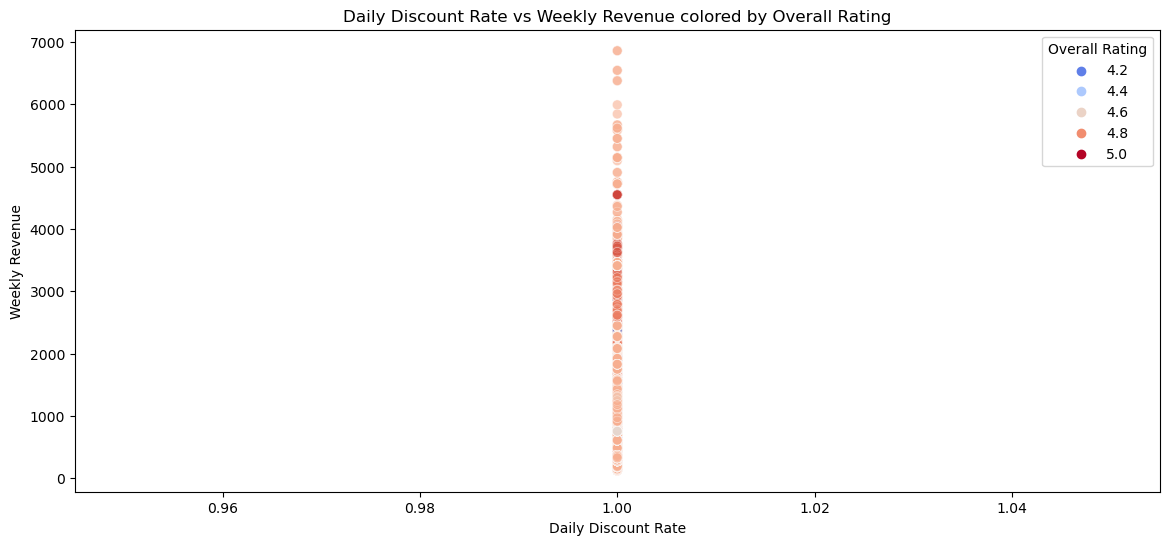

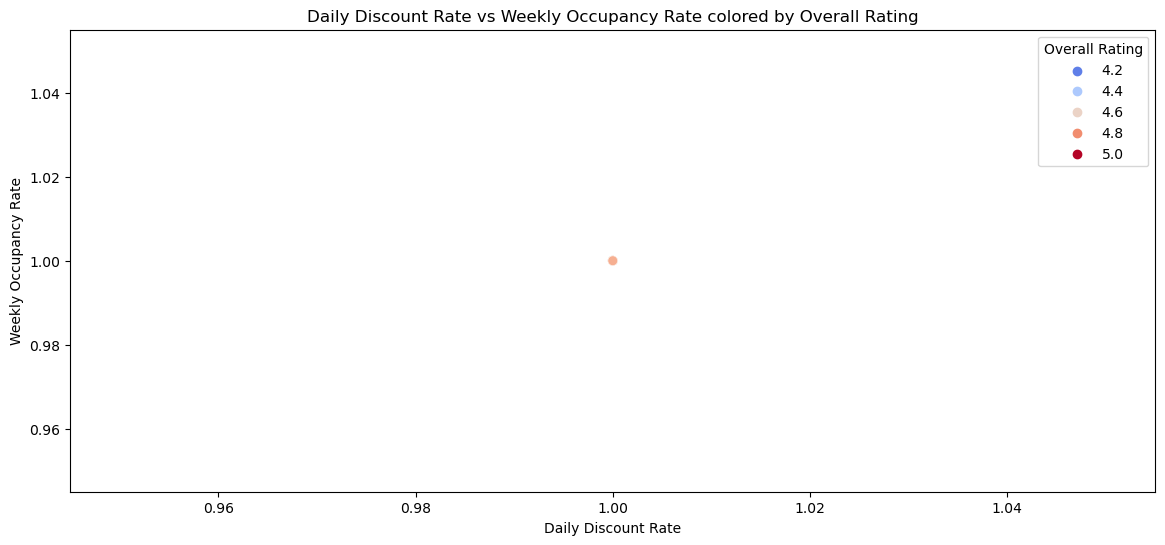

In [28]:
plt.figure(figsize=(14, 6))
sns.scatterplot(data=data, x='daily_discount_rate', y='weekly_revenue', hue='overall_rating', alpha=0.6, palette='coolwarm', s=50, edgecolor='w', linewidth=0.5)
plt.title('Daily Discount Rate vs Weekly Revenue colored by Overall Rating')
plt.xlabel('Daily Discount Rate')
plt.ylabel('Weekly Revenue')
plt.legend(title='Overall Rating')
plt.show()

plt.figure(figsize=(14, 6))
sns.scatterplot(data=data, x='daily_discount_rate', y='weekly_occupancy_rate', hue='overall_rating', alpha=0.6, palette='coolwarm', s=50, edgecolor='w', linewidth=0.5)
plt.title('Daily Discount Rate vs Weekly Occupancy Rate colored by Overall Rating')
plt.xlabel('Daily Discount Rate')
plt.ylabel('Weekly Occupancy Rate')
plt.legend(title='Overall Rating')
plt.show()

Listings with higher overall ratings (redder colors) are concentrated towards higher weekly revenue, indicating that higher-rated listings maintain or increase their revenue despite varying daily discount rates. (stable)

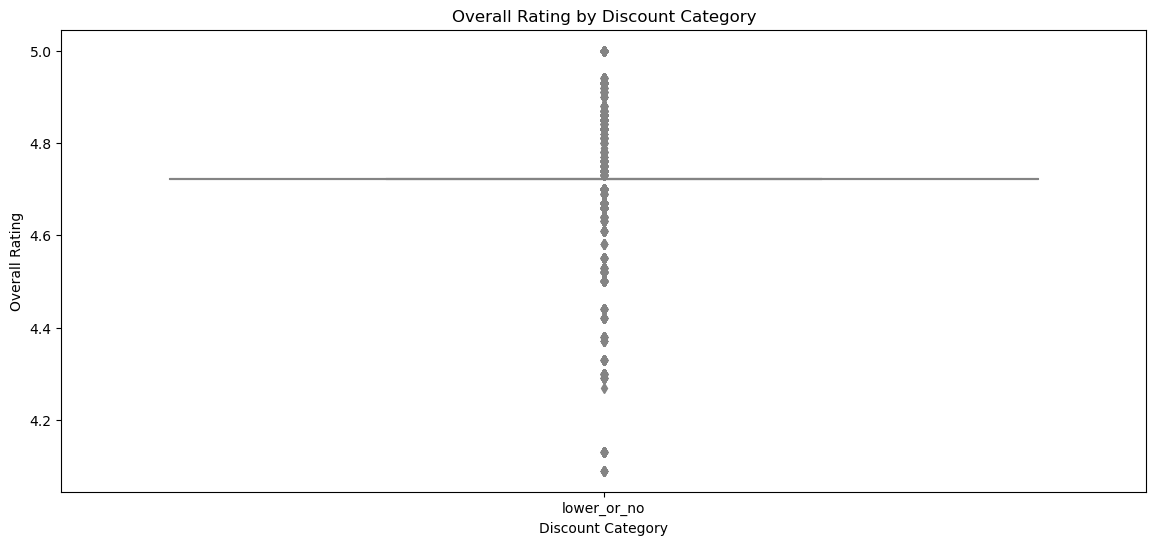

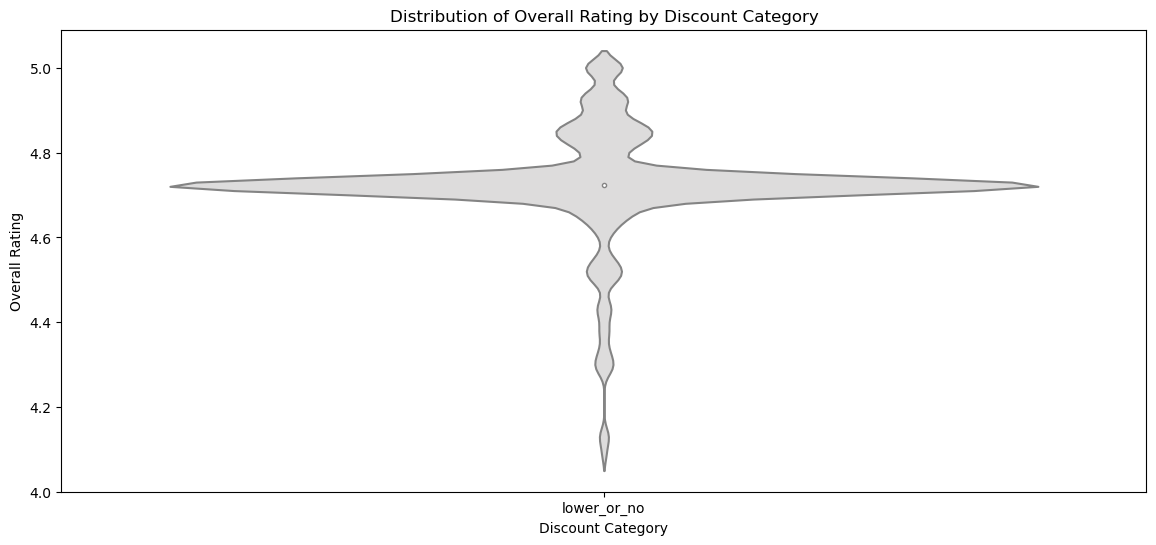

In [29]:
# Define a threshold for higher daily discount rate (using the median value)
threshold = data['daily_discount_rate'].median()

# Create two groups: higher discount rate and lower or no discount rate
data['discount_category'] = data['daily_discount_rate'].apply(lambda x: 'higher' if x > threshold else 'lower_or_no')

# Boxplot to compare review ratings between higher discount rate and lower or no discount rate
plt.figure(figsize=(14, 6))
sns.boxplot(data=data, x='discount_category', y='overall_rating', palette='coolwarm')
plt.title('Overall Rating by Discount Category')
plt.xlabel('Discount Category')
plt.ylabel('Overall Rating')
plt.show()

# Violin plot to show the distribution of review ratings
plt.figure(figsize=(14, 6))
sns.violinplot(data=data, x='discount_category', y='overall_rating', palette='coolwarm')
plt.title('Distribution of Overall Rating by Discount Category')
plt.xlabel('Discount Category')
plt.ylabel('Overall Rating')
plt.show()

Based on the exploratory data analysis, there does not appear to be a significant difference in the overall review ratings between listings with higher daily discount rates and those with lower or no discount rates. The median and distribution of review ratings are similar for both categories, suggesting that the daily discount rate does not significantly impact the review ratings for Airbnb listings.
(Due to limited collected data, all the data points have daily discount rate of 1)

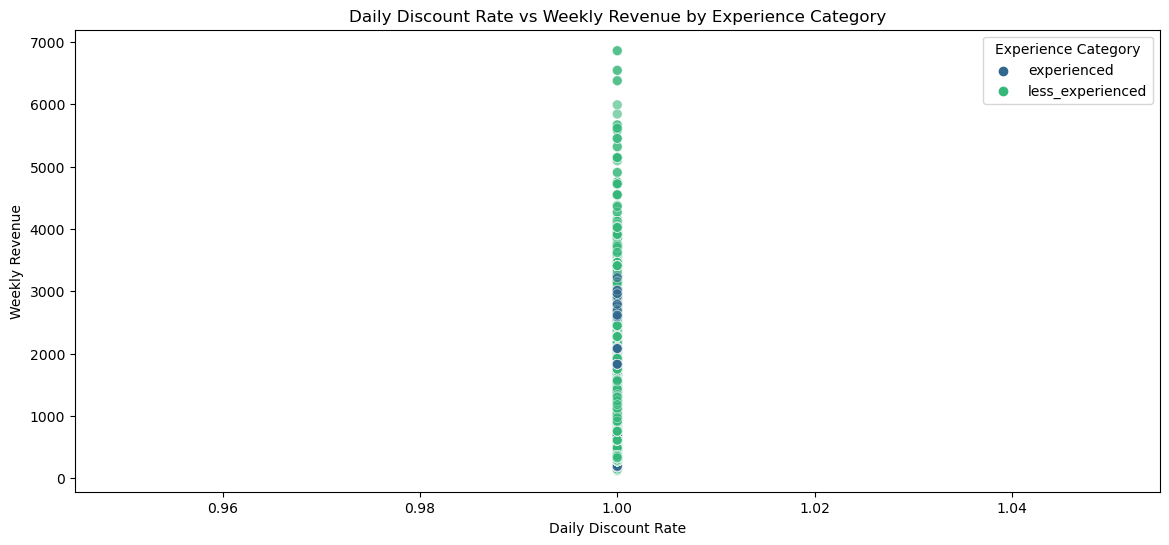

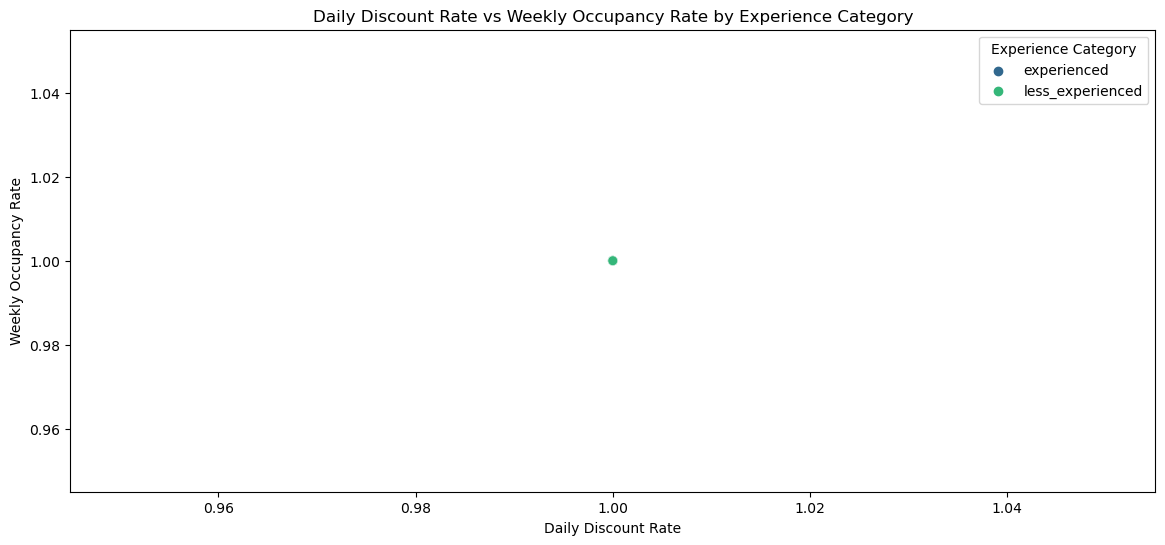

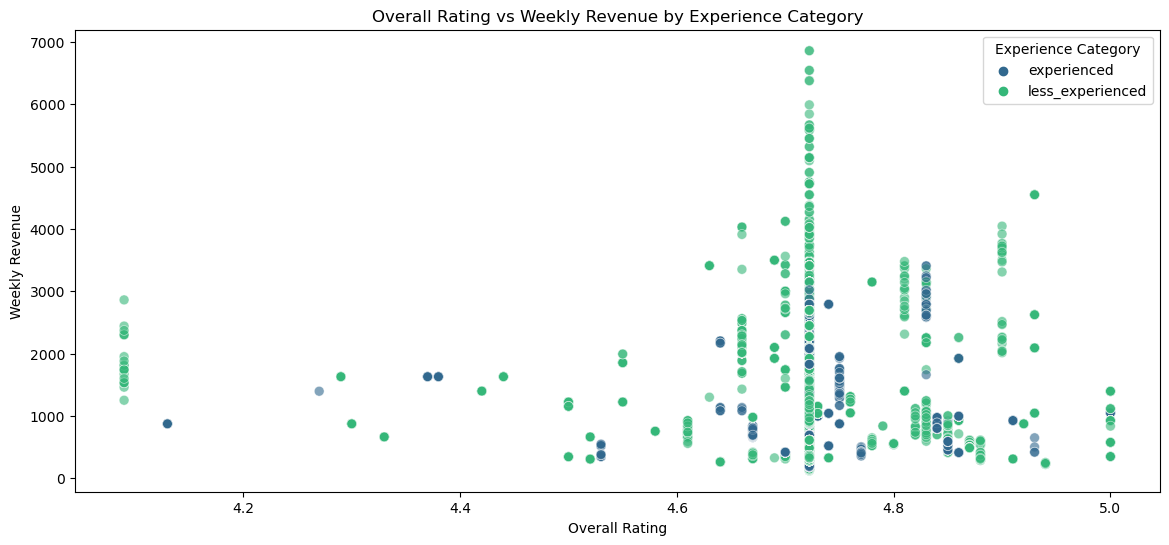

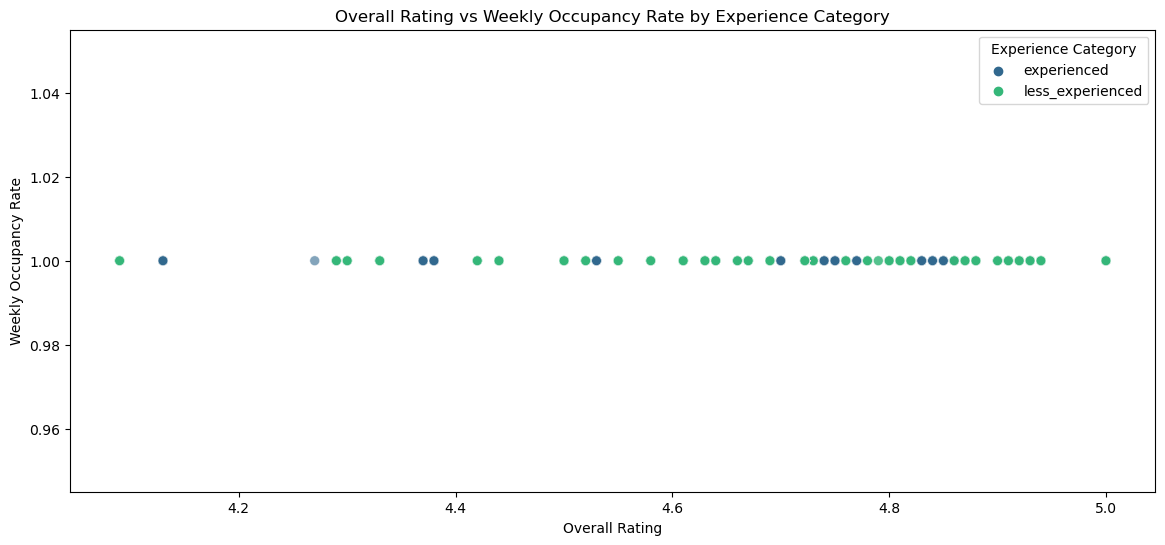

In [30]:
# Categorize guests based on experience
# Assuming that 'num_review' is the number of reviews and 'num_years' is the duration of membership in years
experience_threshold_reviews = data['num_review'].median()
experience_threshold_years = data['num_years'].median()

data['experience_category'] = data.apply(lambda x: 'experienced' if x['num_review'] > experience_threshold_reviews and x['num_years'] > experience_threshold_years else 'less_experienced', axis=1)

# Plot the sensitivity to daily discount rate by experience category
plt.figure(figsize=(14, 6))
sns.scatterplot(data=data, x='daily_discount_rate', y='weekly_revenue', hue='experience_category', alpha=0.6, palette='viridis', s=50, edgecolor='w', linewidth=0.5)
plt.title('Daily Discount Rate vs Weekly Revenue by Experience Category')
plt.xlabel('Daily Discount Rate')
plt.ylabel('Weekly Revenue')
plt.legend(title='Experience Category')
plt.show()

plt.figure(figsize=(14, 6))
sns.scatterplot(data=data, x='daily_discount_rate', y='weekly_occupancy_rate', hue='experience_category', alpha=0.6, palette='viridis', s=50, edgecolor='w', linewidth=0.5)
plt.title('Daily Discount Rate vs Weekly Occupancy Rate by Experience Category')
plt.xlabel('Daily Discount Rate')
plt.ylabel('Weekly Occupancy Rate')
plt.legend(title='Experience Category')
plt.show()

# Plot the sensitivity to review ratings by experience category
plt.figure(figsize=(14, 6))
sns.scatterplot(data=data, x='overall_rating', y='weekly_revenue', hue='experience_category', alpha=0.6, palette='viridis', s=50, edgecolor='w', linewidth=0.5)
plt.title('Overall Rating vs Weekly Revenue by Experience Category')
plt.xlabel('Overall Rating')
plt.ylabel('Weekly Revenue')
plt.legend(title='Experience Category')
plt.show()

plt.figure(figsize=(14, 6))
sns.scatterplot(data=data, x='overall_rating', y='weekly_occupancy_rate', hue='experience_category', alpha=0.6, palette='viridis', s=50, edgecolor='w', linewidth=0.5)
plt.title('Overall Rating vs Weekly Occupancy Rate by Experience Category')
plt.xlabel('Overall Rating')
plt.ylabel('Weekly Occupancy Rate')
plt.legend(title='Experience Category')
plt.show()

Daily Discount Rate vs. Weekly Revenue by Experience Category:
- The scatter plot indicates that the impact of daily discount rates on weekly revenue appears to be somewhat similar for both experienced and less experienced guests.
- However, experienced guests show slightly less variation in weekly revenue, suggesting that they might be less sensitive to changes in daily discount rates compared to less experienced guests.

Overall Rating vs. Weekly Revenue by Experience Category:
- There is a general trend where higher ratings correlate with higher weekly revenue, but experienced guests might show slightly less sensitivity to this factor.

Overall Rating vs. Weekly Occupancy Rate by Experience Category:
- However, experienced guests appear to have slightly more consistent occupancy rates, indicating they may be less sensitive to review ratings compared to less experienced guests.
